In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame, Series
from relative_path import OUTPUT_TRANSFORM

In [2]:
FILE_PARQUET = OUTPUT_TRANSFORM / "processed_track.parquet"

In [3]:
# Reading the tracks data
df_tracks_processed = pd.read_parquet(FILE_PARQUET)

# Renaming columns
df_tracks_processed.rename(columns={
        "total_followers": "artist_total_followers", 
        "mean_popularity": "artist_mean_popularity"
    }, errors="ignore", inplace=True)

In [4]:
# Apply functions
def apply_fn_convert_to_int(input):
    """ Apply function that converts the input into an integer. 
    Sometimes you can't convert the pandas series datatypes natively. """
    try:
        return int(input)
    except:
        return 0

# Changing the datatypes
df_tracks_processed["artist_total_followers"] = df_tracks_processed["artist_total_followers"].apply(apply_fn_convert_to_int)
df_tracks_processed["artist_mean_popularity"] = df_tracks_processed["artist_mean_popularity"].astype("int", errors="ignore")

In [5]:
df_tracks_processed.head(3)

,track_id,track_name,track_popularity,duration_ms,artist_name,artist_id,year,artist_total_followers,artist_mean_popularity
0,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021,48141557,93
1,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021,1444702,88
2,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021,177401,85


In [18]:
def create_category_histogram(input_df:DataFrame, column_name:str, data_name:str, show_plot:bool=False, export_plot:bool=False):
    """ Create category histogram. """
    plt.ioff()
    
    fig = sns.displot(input_df[column_name], discrete=True, aspect=3, height=5, kind='hist',color='orange')
    
    x_label = column_name.replace("_", " ")     # set x label
    title = None    # set title
    
    fig.set(title='Number of songs per year', xlabel=x_label.title())
    fig.tight_layout()
    
    # Export plot?
    if export_plot:
        fig.savefig(data_name)
    
    # Show plot?
    if show_plot:
        plt.show()
    else:
        plt.close("all")        

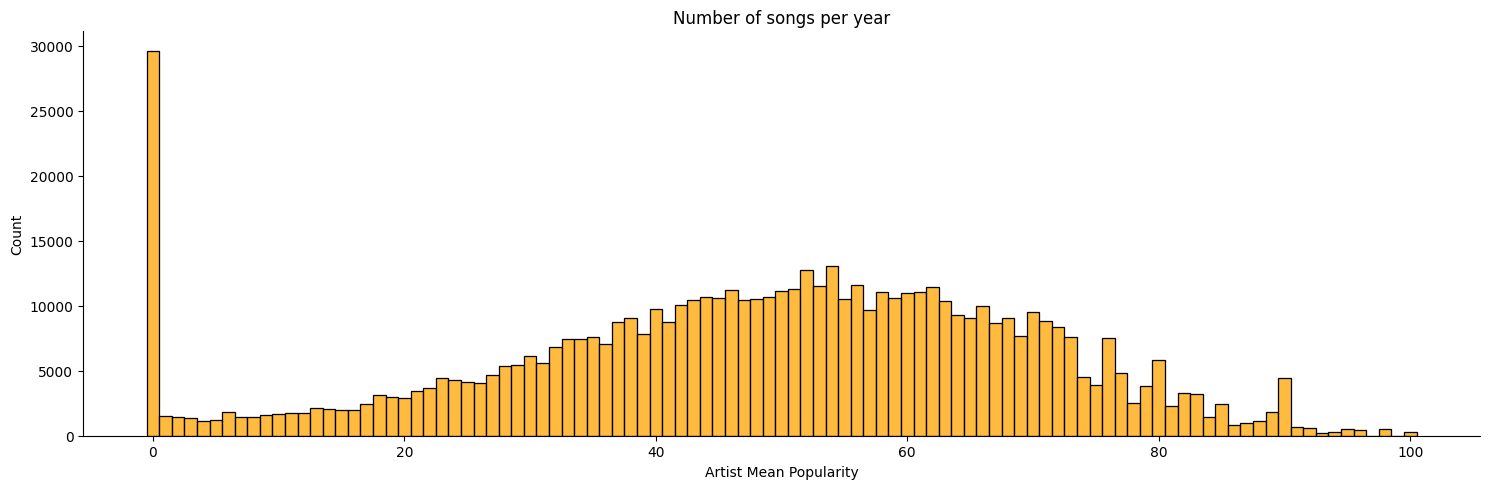

In [19]:
# Histogram
create_category_histogram(df_tracks_processed, column_name="artist_mean_popularity", data_name="sample", show_plot=True, export_plot=True)